# Alex Glebavicius Personal Notebook

### Introduction
For my personal aspect of the project, I will be using a dataset that reports fatal overdose accidental deaths in Allegheny County. Since this dataset covers the whole county I had to split it up and parse only Pittsburgh zip codes from it. The reason I chose this metric is because for many classes I have done research on addiction and various other aspects associated with overdoses, so this is an area that interests me and was able to read up about neighborhoods struggling with overdoses and addiction. Other alternatives I almost explored were walkability scores, amount of supermarkets and hilliest neighborhoods. 

### The Metric
As noted, the metric I chose was a dataset that reports accidental fatal overdose deaths in Allegheny County. The features I will be using and measuring are zip codes, race, sex, and age. Using these variables from the datset I will attempt to find the neigborhood with the lowest amount of reported overdoses. This will be found by comparing the amount of deaths associated with each zip code. Furthermore, the race, sex and age will be used as a reference and visualiztion to show what groups are affected the most. 

Why this metric? Addiction is a sad sight to see but it is something often attributed to enviromental factors surrounding a persons life.

### The Best Neighorhood

In [2]:
import pandas as pd     #importing pandas
import matplotlib.pylab as plt #importing matlabplot
df = pd.read_csv('overdosepittsburgh.csv', sep=',')  #read the csv file
pghzip = pd.read_csv('pittsburghzipcode.csv', sep=',') #csv file for pittsburgh exclusive zip codes
#df.head() #testing if dataframe loaded properly 
#len(df['incident_zip']) #test

In [3]:
#add zip codes to a dictionary, if unique, set to 1 if not add to the dictionary, we then sort this by largest

pghzips = {} #creating dict of just pgh zip codes
for index, row in pghzip.iterrows(): #index each row 
    pghzips[str(row['ZIP Code'])] = 1 #add the zip code and set value to 1 

zip_codes = {} #initalize dictionary for key,value pairs
count = 0
for index, row in df.iterrows(): #looping through each row
    if row['incident_zip'] in pghzips.keys(): #checking to see if the zip code we are at is in pittsburgh or not
        if row['incident_zip'] in zip_codes.keys(): #if it already exists just add 1 to the current count
            zip_codes[row['incident_zip']] = 1 + zip_codes[row['incident_zip']] 
        else:
            zip_codes[row['incident_zip']] = 1 #otherwise this is a unique key so set to one 
    else:
        count +=1 #does nothing but track how many non pittsburgh zip codes are in the df
#print(zip_codes)
sort_by_largest = sorted(zip_codes.items(), key=lambda x: x[1], reverse=True) #sorting the dict from largest to smallest, turns it into a list
#print(sort_by_largest)


#print("Manchester Neighborhood has the lowest rate, Shadyside in close second")
#print percentages of it 

### Code explanation 

The process used to get these results was by making two dictionaries and mapping each zip code to the number of deaths associated with it. The first dictionary (pghzips) was used to gather each pittsburgh zip code from the dataframe. This was done by making a custom csv file that had every zip code in pittsburgh sourced by https://www.zip-codes.com/city/pa-pittsburgh.asp. Furthermore, with the other dictionary I iterrated through each row, first checking if the zip code was a member of the pghzips dictionary and if so, map a value to it depending on if it was a unique zip (1) or a new zip (1 + curr). Upon doing this we now have a dictionary of all the pittsburgh zip codes and how many overdose deaths were reported there. Finally, this dictionary was sorted and then used to make charts and visuals to rank each neigborhood. 

As seen below, the chart ranks Manchester in first place with the lowest amount of deaths with Shadyside in a *very* close second place. 


| Neighborhood            | Amount of Deaths |                          
|-------------------------|------------------|     
| Manchester              |        14        |
| Shadyside               |  15              |
| Fox Chapel              |  28
| Strip District          |  36              
| Squirrel Hill           | 39
| Oakland                 | 44
| Swisshelm Park          | 47
| Homewood                | 58
| Castle Shannon          | 58
| Elliot                  | 60
| Sharpsburg              | 64
| Corliss                 | 65
| Bloomfield              | 66
| Summer Hill             | 72
| South Side Slopes       | 76
| Hazelwood               | 78
| Central Lawrenceville   | 82
| Pleasant Hills          | 100
| South Shore             | 103
| Brookline               | 106
| Carnegie                | 110
| Hill District           | 114
| Crafton Heights         | 120
| Homestead               | 122
| East Liberty            | 132
| East Hills              | 141
| Brentwood               | 146
| South Hills             | 154
| Penn Hills              | 160
| Central Northside       | 238
| Mount Oliver            | 295

<BarContainer object of 31 artists>

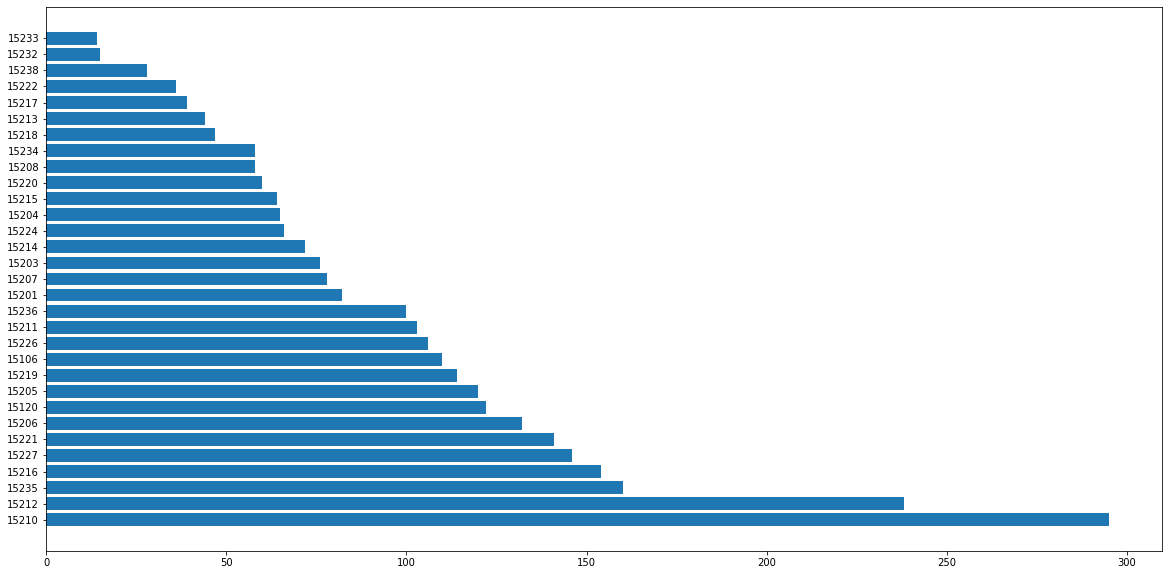

In [8]:
#pd.DataFrame(zip_codes, index=['Race']).plot(kind='bar',figsize=(20,16))
#to get my bar graph in order 
keys = []
values = []
for item in sort_by_largest:
    keys.append(item[0]), values.append(item[1])
plt.figure(figsize=(20, 10))
plt.barh(keys,values)

Seeing these very close results I decided to investigate further and explore both neighborhoods. I found out that Manchester only has a population of 2130 as of the 2010 Census Report. On the otherhand, Shadyside has a population of 14,317 which is almost 7x the amount Manchester has. Therefore, converting both neighborhoods' amount of overdose deaths to percentages with respect to population we see Manchester at 0.65% and Shadyside at 0.10%.

Because of this I will declare the final winner of the best neighborhood to be Shadyside.

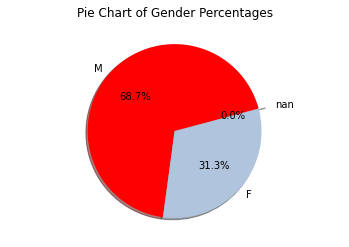

41


<AxesSubplot:>

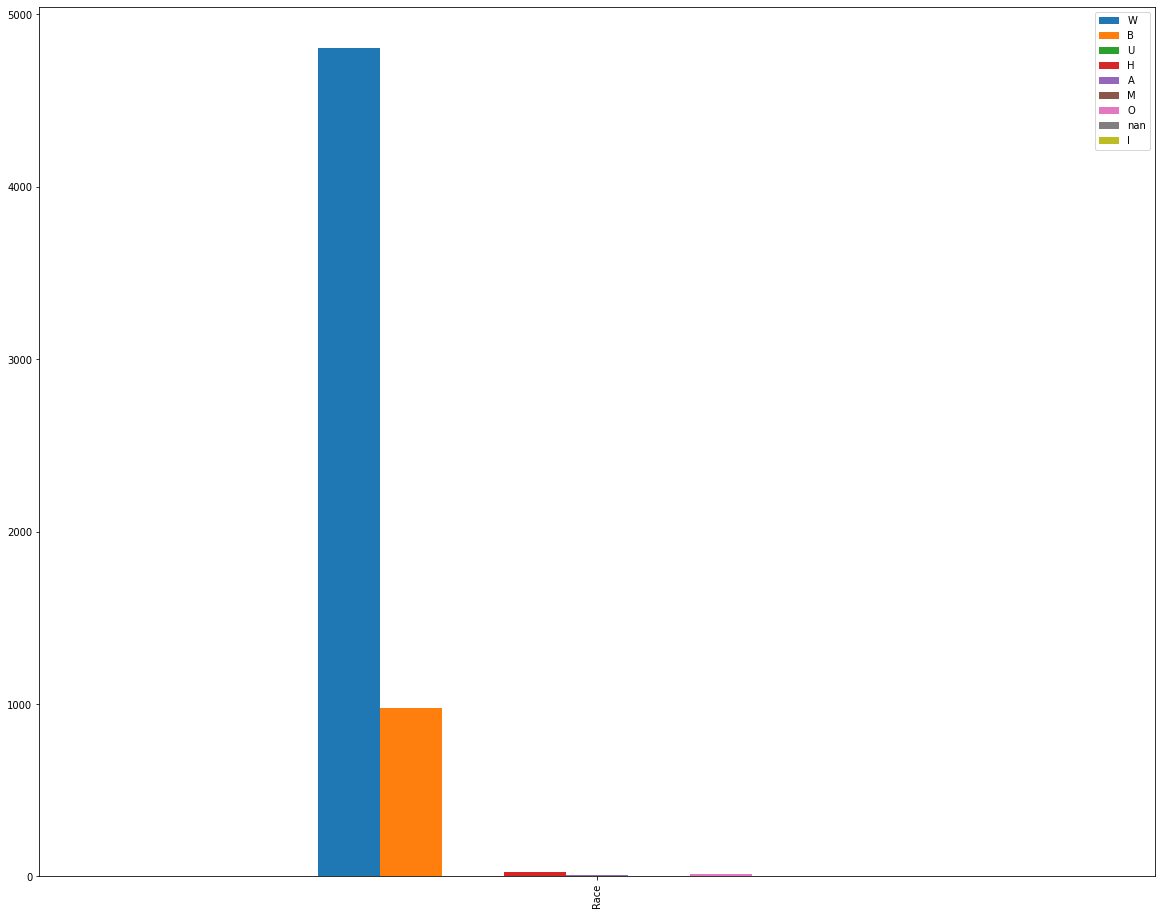

In [5]:
sex_stat = {} #dictionary to find out male/woman split
for index, row in df.iterrows(): #indexing each row
    if row['sex'] in sex_stat.keys(): #if it already exists 
        sex_stat[row['sex']] = 1 + sex_stat[row['sex']] #add to current count
    else:
        sex_stat[row['sex']] = 1 #else this is unique so set value to one
#print(sex_stat)
#Creating a pie chart of the percentages between men and woman 
plt.title('Pie Chart of Gender Percentages')
plt.axis('equal')
my_colors = ['red','lightsteelblue','silver']
my_explode = (0, 0, 0.1)
plt.pie(sex_stat.values(), labels=sex_stat.keys(),autopct='%1.1f%%', startangle=15, shadow = True, colors = my_colors, explode= my_explode)
plt.show()

age_count = 0 #tracking age to find avg age of affected people
for index, row in df.iterrows():    #go through each row in df 
    age_count += row['age']         #add the age in the row of 'age' to count
print(age_count//len(df['age']))    #finding the average here


race_stat = {} #tracking the races of affected people
for index, row in df.iterrows():    #go through each row in df
    if row['race'] in race_stat.keys(): #if exists already 
        race_stat[row['race']] = 1 + race_stat[row['race']]     #just add to curr and that row
    else:
        race_stat[row['race']] = 1  #else its unique
#print(race_stat)

pd.DataFrame(race_stat, index=['Race']).plot(kind='bar',figsize=(20,16))







### Code Explanation 

The code to find certain demographic stats follows the same pattern as explained before. Here I went on to find the percentages of Male/Females, the average age and the races affected by overdoses. Finding the gender and race stats I followed the same structure where I iterate the rows and add them to a dictionary. For the age stat I just looped through the rows of 'Age' and had a running count that I divided by the length of rows to find the average age. 

### Conclusion
    After looking through the data, finding out Shadyside was the winning neighborhood was not surprising to me. Through my visits to the neighborhood and experiences there it is a vibrant and energetic neighborhood with many different forms of shops, bars, and activies to do. Specifically focusing on my metric, I made sure not to make a prediction on which neighborhood would have the least amount of overdoses. This is because addiction does not discriminate and can affect anyone and everyone, so even if a neighborhood seems vibrant you never know what internal issues may lie. Through the data and post data analysis we see how far Shadyside lies from every other neighborhood with having such a low rate of overdose deaths. 

    Personally, my favorite neighborhood is Lawrenceville because of the Thunderbird cafe. I saw my favorite band, Phoneboy and I found the venue to be really fun and unique because it starts off as a bar but as you go downstairs theres a decent sized stage area. Furthermore, the post concert adventures were plentiful as we had many shops and bars to explore. I highly recommend you all check out Millies Homemade Ice Cream Shop it was really a top 2 ice cream place of all time for me. 
